# DATA PREPROCESSING SAMPLE FOR LOAN PREDICTION

## DATA CLEANING
## Handle Missing Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [3]:
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
print(TrainData)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [4]:
#Identify missing data of both types, numerical and categorical data
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
print(NumericData)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [5]:
#Numerical data with loan id
TrainData_n = TrainData[NumericData]
print(TrainData_n, '\n')

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978             2900                0.0        71.0             360.0   
LP002979             4106                0.0        40.0             180.0   
LP002983             8072              240.0       253.0             360.0   
LP002984             7583                0.0       187.0             360.0   
LP002990             4583                0.0       133.0        

In [6]:
#make sure there are no missing values
#if there are missing values replace with 0
#eliminate any tuple with an attribute marked as 0
MissingZero = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value = 0)
MissingZero.fit(TrainData_n)
TrainData_n = MissingZero.transform(TrainData_n)
print(TrainData_n)

[[5.849e+03 0.000e+00 0.000e+00 3.600e+02 1.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 3.600e+02 1.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 3.600e+02 1.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 3.600e+02 1.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 3.600e+02 1.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 3.600e+02 0.000e+00]]


In [7]:
CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
print(CategoricData)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [8]:
TrainData_c = TrainData[CategoricData]
print(TrainData_c, '\n')

          Gender Married Dependents     Education Self_Employed Property_Area  \
Loan_ID                                                                         
LP001002    Male      No          0      Graduate            No         Urban   
LP001003    Male     Yes          1      Graduate            No         Rural   
LP001005    Male     Yes          0      Graduate           Yes         Urban   
LP001006    Male     Yes          0  Not Graduate            No         Urban   
LP001008    Male      No          0      Graduate            No         Urban   
...          ...     ...        ...           ...           ...           ...   
LP002978  Female      No          0      Graduate            No         Rural   
LP002979    Male     Yes         3+      Graduate            No         Rural   
LP002983    Male     Yes          1      Graduate            No         Urban   
LP002984    Male     Yes          2      Graduate            No         Urban   
LP002990  Female      No    

In [9]:
MissingStatus1 = SimpleImputer(missing_values = np.NaN , strategy = 'mean')
MissingStatus1.fit(TrainData_n)
TrainData_n = MissingStatus1.transform(TrainData_n)
print(TrainData_n)

[[5.849e+03 0.000e+00 0.000e+00 3.600e+02 1.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 3.600e+02 1.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 3.600e+02 1.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 3.600e+02 1.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 3.600e+02 1.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 3.600e+02 0.000e+00]]


In [10]:
MissingStatus = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value = 'Not Applicable')
MissingStatus.fit(TrainData_c)
TrainData_c = MissingStatus.transform(TrainData_c)
print(TrainData_c)

[['Male' 'No' '0' ... 'No' 'Urban' 'Y']
 ['Male' 'Yes' '1' ... 'No' 'Rural' 'N']
 ['Male' 'Yes' '0' ... 'Yes' 'Urban' 'Y']
 ...
 ['Male' 'Yes' '1' ... 'No' 'Urban' 'Y']
 ['Male' 'Yes' '2' ... 'No' 'Urban' 'Y']
 ['Female' 'No' '0' ... 'Yes' 'Semiurban' 'N']]


In [11]:
TrainData[NumericData] = TrainData_n
TrainData[CategoricData] = TrainData_c
print(TrainData)


          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [12]:
# showing the univariant statistics for all variables

In [13]:
TrainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
# showing the bivariant statistics between each variable with the Loan Status(Yes or No)

In [15]:
TrainData.groupby("Loan_Status").describe()

ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          192.0  0.505208  0.501280  0.0   
Y                      360.0  480.0          422.0  0.895735  0.305967  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

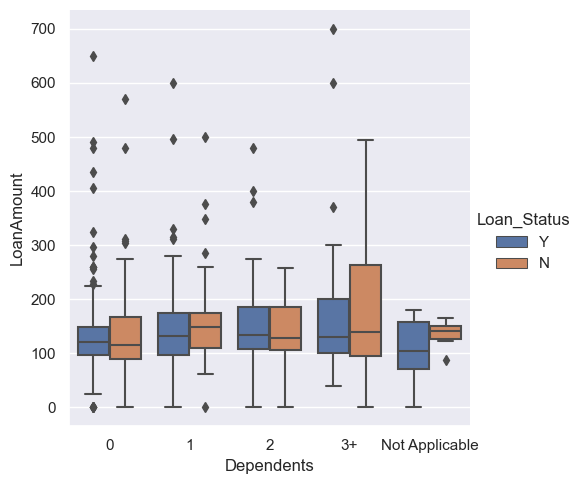

In [16]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


sns.catplot(
    data=TrainData, kind ="box",
    x="Dependents", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
)



In [17]:

sns.set_theme()


sns.scatterplot( data=TrainData,
    x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

## Handle Noisy Data
## Binning By pd.cut

In [18]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
print(TrainData['ApplicantIncome'].describe())
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [19]:
Bins = 10
ApplicantIncomeBinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

(69.0, 8235.0]        533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(24405.0, 32490.0]      0
(32490.0, 40575.0]      4
(40575.0, 48660.0]      0
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(64830.0, 72915.0]      0
(72915.0, 81000.0]      1
Name: ApplicantIncome, dtype: int64


In [20]:
TrainData['ApplicantIncome_Bin'] = pd.cut(TrainData['ApplicantIncome'], Bins, labels = False)
#print(TrainData.head())                                          

In [21]:
print(TrainData['CoapplicantIncome'].describe())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


In [22]:
print(TrainData['LoanAmount'].describe())

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


## Binning By Feature Engine

In [23]:
import numpy.typing
from feature_engine.discretisation import EqualWidthDiscretiser
#Bin by Applicant Income, Coapplicant Income, Loan Amount
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

(-inf, 8235.0]        533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(32490.0, 40575.0]      4
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(72915.0, inf]          1
Name: ApplicantIncome, dtype: int64

In [24]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

(-inf, 4166.7]        561
(4166.7, 8333.4]       46
(8333.4, 12500.1]       3
(16666.8, 20833.5]      2
(33333.6, 37500.3]      1
(37500.3, inf]          1
Name: CoapplicantIncome, dtype: int64

In [25]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

(70.0, 140.0]     313
(140.0, 210.0]    152
(-inf, 70.0]       78
(210.0, 280.0]     37
(280.0, 350.0]     15
(350.0, 420.0]      6
(420.0, 490.0]      5
(560.0, 630.0]      3
(490.0, 560.0]      3
(630.0, inf]        2
Name: LoanAmount, dtype: int64

## Binning By KBinsDiscretizer 

In [26]:
from sklearn.preprocessing import KBinsDiscretizer

In [27]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

In [28]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


## Single Linear Regression

In [29]:
import numpy as np
import pandas as pd

x = TrainData['ApplicantIncome']
y = TrainData['ApplicantIncome']

In [30]:
#Linear Regression of ApplicantIncome and LoanAmount
ApplicantIncomeMean = sum(TrainData['ApplicantIncome'])/614
LoanAmountMean = sum(TrainData['LoanAmount'])/614
print("ApplicantIncomeMean: ", ApplicantIncomeMean,'\n')
print("LoanAmountMean: ", LoanAmountMean, '\n')

ApplicantIncomeMean:  5403.459283387622 

LoanAmountMean:  141.16612377850163 



In [31]:
xxtotal = 0
xytotal = 0
for i in range(614):
    xdiff = (x[i] - ApplicantIncomeMean)**2
    #print("x:", xdiff)
    xxtotal = xxtotal + xdiff
    ydiff = (x[i] - ApplicantIncomeMean) * (y[i] - LoanAmountMean)
    #print("y:", ydiff)
    xytotal = xytotal + ydiff

#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)
print("SSx: ", "{0: .3f}".format(xxtotal), '\n')
print("SPxy: ", "{0: .3f}".format(xytotal), '\n')

SSx:   22877399172.482 

SPxy:   22877399172.482 



In [32]:
slope = xytotal / xxtotal
print("Slope: ", "{0: .3f}".format(slope), '\n')
intercept = LoanAmountMean - (slope * ApplicantIncomeMean)
print("Intercept: ", "{0: .3f}".format(intercept), '\n')
print("y = ", slope, "x + ", intercept, '\n')

Slope:   1.000 

Intercept:  -5262.293 

y =  1.000000000000002 x +  -5262.293159609131 



In [33]:
predicted = []
residual = []
#residual = predicted - actual
for p in range(len(x)):
    #predicted = slope * (x[p]) + intercept
    predicted.append(slope * (x[p]) + intercept)
    residual.append(predicted[p] - y[p])
    #print("x:", x[p]," y:", y[p], "predicted:", "{0: .2f}".format(predicted[p]), "residual:", "{0: .2f}".format(residual[p]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])

In [34]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

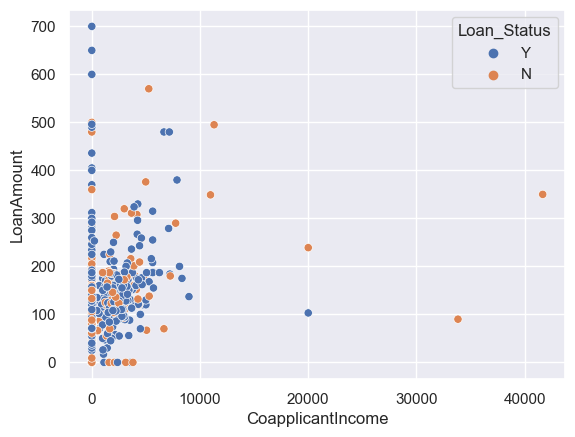

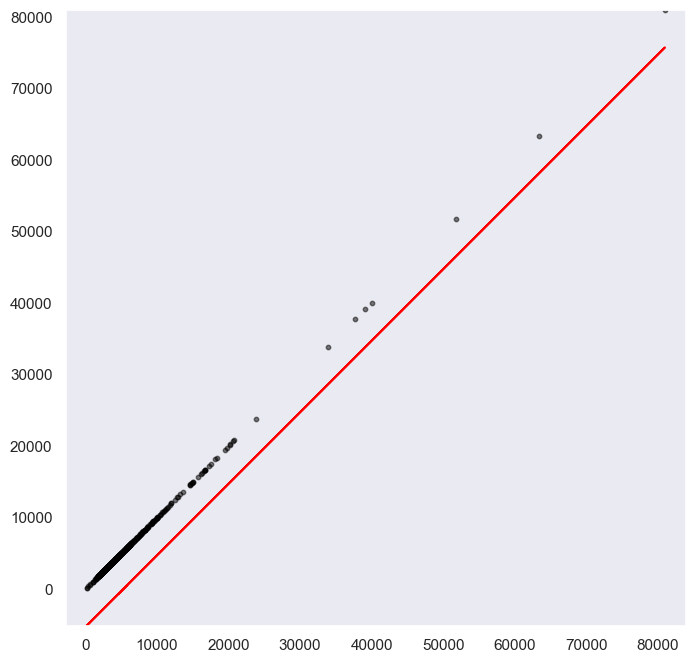

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color = "black", alpha = 0.5, s = 10)
plt.plot(x, predicted, color = "red")
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('equal')
plt.show()

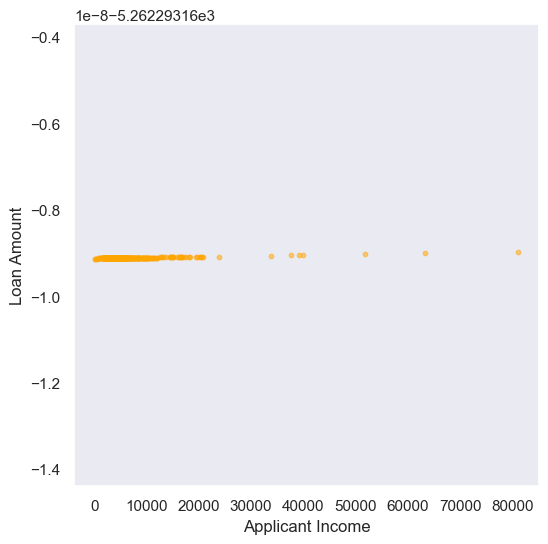

In [36]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools

standardised_residuals = residual / np.std(residual)
#print(standardised_residuals)
plt.figure(figsize=(6,6))
plt.scatter(x, residual, color = "orange", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

#Sample points from the above graph 
def select_subset(seq, size):
    return seq[:size]

plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

Xi_sample = [select_subset(x, 100)]
Yi_sample = [select_subset(residual, 100)]
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.scatter(Xi_sample, 
            Yi_sample, 
            marker="o", color="blue", alpha = 0.5 , s = 50)

In [37]:
'''fig,ax = plt.subplots(6,6)
ax.plot(x, residual)
ax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])
ax_zoom.plot(x,y)
plt.show()'''

'fig,ax = plt.subplots(6,6)\nax.plot(x, residual)\nax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])\nax_zoom.plot(x,y)\nplt.show()'

## Multilinear Regression : Dependents and Property and Income VS Loan Amount

In [38]:
#X = TrainData[['Dependents','Property_Area','ApplicantIncome']]
X = TrainData[['ApplicantIncome', 'CoapplicantIncome']]
Y = TrainData['LoanAmount']

In [39]:
from sklearn import linear_model

In [40]:
MultiReg = linear_model.LinearRegression()
MultiReg.fit(X, Y)

LinearRegression()

In [41]:
LoanPredicted = MultiReg.predict([[1000, 1300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[2000, 2300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[3000, 3300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[4000, 4300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[5000, 5300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[6000, 6300]])
print(LoanPredicted)

[102.49516573]
[118.45944088]
[134.42371604]
[150.38799119]
[166.35226635]
[182.3165415]


E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid fea

## Clustering By KMeans

In [42]:
import numpy as np
import pandas as pd

In [43]:
TrainDataK = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = "Loan_ID")
print(TrainDataK)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [45]:
KMeanEncoder = LabelEncoder()

KMeanEncoder.fit(TrainDataK["LoanAmount"])
TrainDataK["LoanAmount"] = KMeanEncoder.transform(TrainDataK["LoanAmount"])
KMeanEncoder.fit(TrainDataK["Gender"])
TrainDataK["Gender"] = KMeanEncoder.transform(TrainDataK["Gender"])
KMeanEncoder.fit(TrainDataK["Married"])
TrainDataK["Married"] = KMeanEncoder.transform(TrainDataK["Married"])
KMeanEncoder.fit(TrainDataK["Dependents"])
TrainDataK["Dependents"] = KMeanEncoder.transform(TrainDataK["Dependents"])
KMeanEncoder.fit(TrainDataK["Education"])
TrainDataK["Education"] = KMeanEncoder.transform(TrainDataK["Education"])

KMeanEncoder.fit(TrainDataK["Self_Employed"])
TrainDataK["Self_Employed"] = KMeanEncoder.transform(TrainDataK["Self_Employed"])
KMeanEncoder.fit(TrainDataK["ApplicantIncome"])
TrainDataK["ApplicantIncome"] = KMeanEncoder.transform(TrainDataK["ApplicantIncome"])
KMeanEncoder.fit(TrainDataK["CoapplicantIncome"])
TrainDataK["CoapplicantIncome"] = KMeanEncoder.transform(TrainDataK["CoapplicantIncome"])
KMeanEncoder.fit(TrainDataK["Loan_Amount_Term"])
TrainDataK["Loan_Amount_Term"] = KMeanEncoder.transform(TrainDataK["Loan_Amount_Term"])
KMeanEncoder.fit(TrainDataK["Credit_History"])
TrainDataK["Credit_History"] = KMeanEncoder.transform(TrainDataK["Credit_History"])
KMeanEncoder.fit(TrainDataK["Property_Area"])
TrainDataK["Property_Area"] = KMeanEncoder.transform(TrainDataK["Property_Area"])
KMeanEncoder.fit(TrainDataK["Loan_Status"])
TrainDataK["Loan_Status"] = KMeanEncoder.transform(TrainDataK["Loan_Status"])

In [46]:
KMeanClusters = KMeans(n_clusters = 5).fit(TrainDataK.iloc[:, :])
print(KMeanClusters.labels_, '\n')
print(KMeanClusters.cluster_centers_, '\n')

[1 4 0 3 1 2 0 3 4 2 0 0 3 3 0 4 4 4 4 3 1 2 0 3 2 1 3 4 0 4 2 0 4 4 2 3 0
 4 2 4 4 0 0 2 4 4 4 1 3 2 0 0 4 4 1 0 0 3 2 3 3 0 3 1 4 2 3 1 1 4 3 0 4 4
 1 4 2 3 3 3 4 0 0 2 4 3 3 3 1 2 3 2 0 4 4 1 3 0 4 3 2 2 1 2 4 0 1 1 2 0 4
 3 3 1 4 1 3 0 2 1 2 4 3 0 2 4 1 4 2 2 1 0 0 4 4 2 4 3 1 4 2 1 1 3 1 3 1 0
 1 4 1 3 1 0 0 1 1 1 3 2 0 1 0 4 1 2 4 3 0 1 0 1 4 2 4 4 0 2 4 0 2 3 4 1 4
 2 0 3 3 1 4 1 1 4 4 3 2 3 3 1 3 4 4 4 4 4 0 2 0 4 1 4 1 1 3 4 0 4 4 2 0 4
 3 1 1 4 4 1 4 1 3 4 3 1 0 1 1 4 4 4 2 3 3 1 3 2 1 1 0 0 3 4 3 3 1 0 1 4 1
 4 2 3 4 1 4 2 4 4 4 0 0 1 0 3 4 0 2 0 1 4 2 4 0 0 1 3 0 4 4 1 3 4 0 1 3 4
 1 4 2 3 3 0 4 0 2 0 4 0 1 1 0 3 0 1 0 4 4 3 4 1 3 4 4 3 1 2 4 2 2 0 4 0 0
 1 1 2 1 3 0 4 0 0 4 0 3 3 3 3 2 3 1 2 3 4 0 4 2 4 0 2 4 2 2 3 1 1 0 4 1 2
 1 4 2 3 0 4 2 4 0 4 3 2 1 1 4 4 0 3 3 4 1 1 3 0 0 4 0 0 4 0 0 0 3 0 1 4 3
 0 1 1 4 1 1 3 3 0 0 3 3 0 1 0 0 1 1 3 4 1 0 0 1 1 1 3 4 1 0 0 1 1 2 1 2 1
 2 4 4 4 4 0 0 0 4 3 1 4 4 2 4 1 3 1 3 4 4 1 0 1 3 2 3 0 4 0 2 1 1 0 1 0 4
 0 3 1 1 3 4 1 2 0 3 1 4 

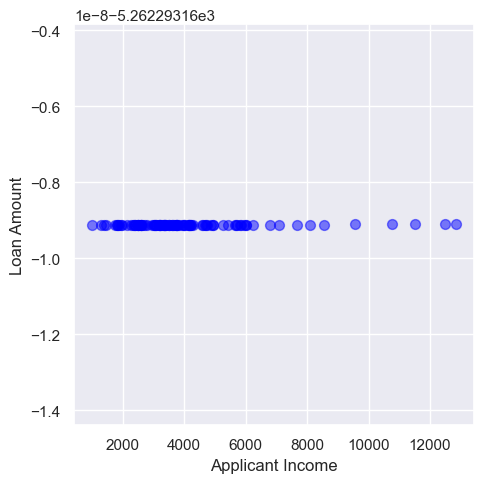

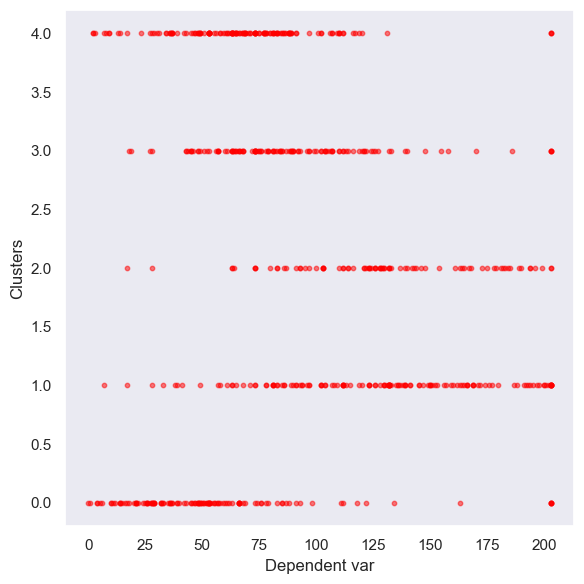

In [47]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools
XDep = TrainDataK['LoanAmount']
plt.figure(figsize=(6,6))
plt.scatter(XDep, KMeanClusters.labels_, color = "red", alpha = 0.5 , s = 10)
#plt.scatter(XDep, KMeanClusters.cluster_centers_, color = "black", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Dependent var')
plt.ylabel('Clusters')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

## Clustering By KMedoids

In [48]:
import numpy as np
from sklearn_extra.cluster import KMedoids

In [51]:
X = np.array([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
kmedoids.labels_
np.array([0, 0, 0, 1, 1, 1])
kmedoids.predict([[0,0], [4,4]])
np.array([0, 1])
kmedoids.cluster_centers_
np.array([[1., 2.],
       [4., 2.]])
kmedoids.inertia_

8.0

# the correlations and their visualization


In [89]:
corr_matrix = TrainData.corr()
print(corr_matrix)

                     ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome             1.000000          -0.116605    0.538290   
CoapplicantIncome          -0.116605           1.000000    0.190377   
LoanAmount                  0.538290           0.190377    1.000000   
Loan_Amount_Term           -0.015645          -0.050321    0.058519   
Credit_History              0.006986          -0.058795   -0.032711   
ApplicantIncome_Bin         0.961095          -0.079156    0.510856   

                     Loan_Amount_Term  Credit_History  ApplicantIncome_Bin  
ApplicantIncome             -0.015645        0.006986             0.961095  
CoapplicantIncome           -0.050321       -0.058795            -0.079156  
LoanAmount                   0.058519       -0.032711             0.510856  
Loan_Amount_Term             1.000000        0.050145            -0.003930  
Credit_History               0.050145        1.000000             0.014766  
ApplicantIncome_Bin         -0.003930   

In [ ]:
#the following is the visualization of the correlation matrix which shows the strength of the relation between each 2 variables
# you will find that we did not visualize the variable with itself because it will always be (1)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

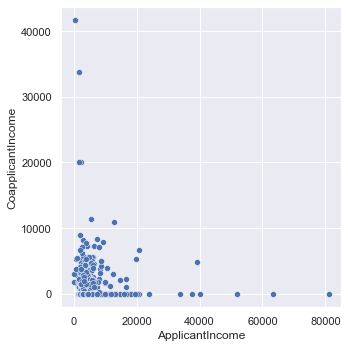

In [118]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="CoapplicantIncome")
# negative weak relation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

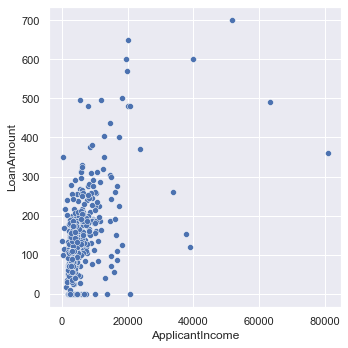

In [119]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="LoanAmount")
#positive medium relation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

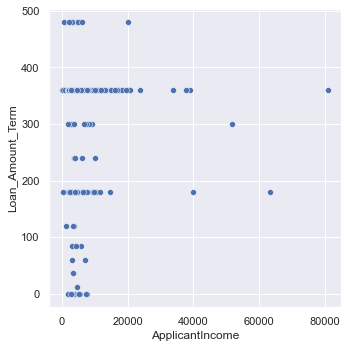

In [120]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="Loan_Amount_Term")
# no relation (<-0.3)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

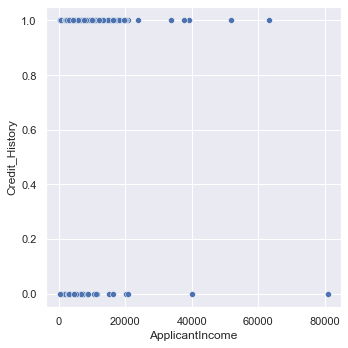

In [121]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="Credit_History")
# no relation (<0.3)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome_Bin'>

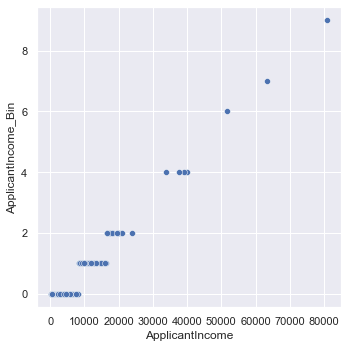

In [122]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="ApplicantIncome_Bin")
#very strong positive relation

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

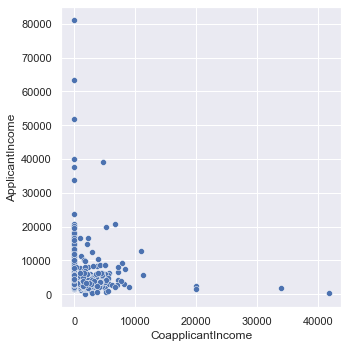

In [123]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="ApplicantIncome")
#  weak negative relation

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

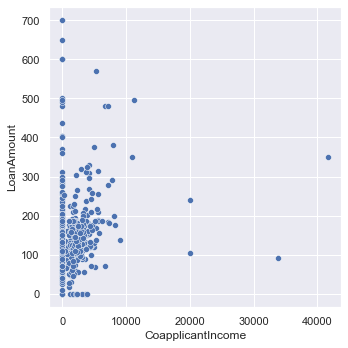

In [124]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="LoanAmount")
# no relation (<0.3)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Amount_Term'>

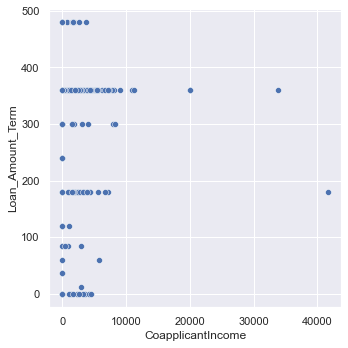

In [125]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="Loan_Amount_Term")
# no relation (<-0.3)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Credit_History'>

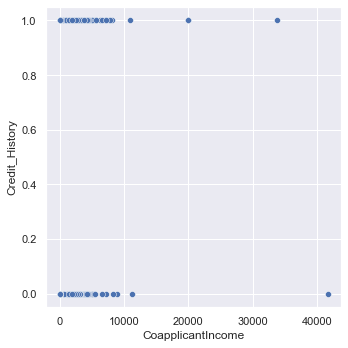

In [126]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="Credit_History")
# no relation(<-0.3)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome_Bin'>

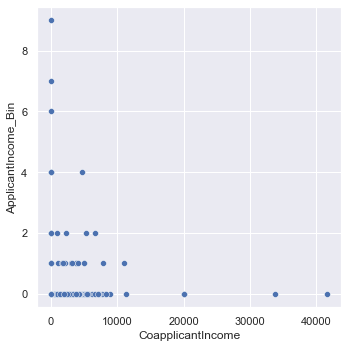

In [127]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="ApplicantIncome_Bin")
# no relation (<-0.3)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

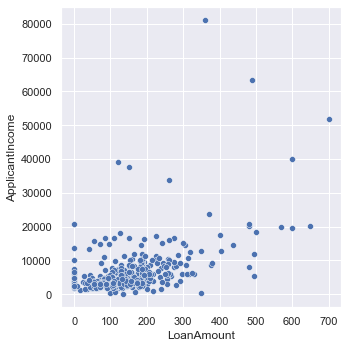

In [128]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="ApplicantIncome")
# medium positive relation

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

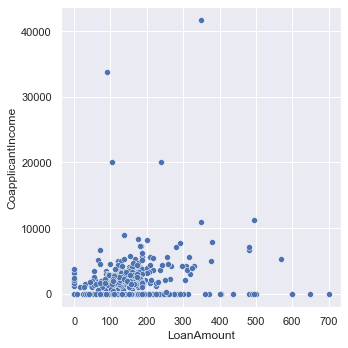

In [129]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="CoapplicantIncome")
# weak positive relation

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

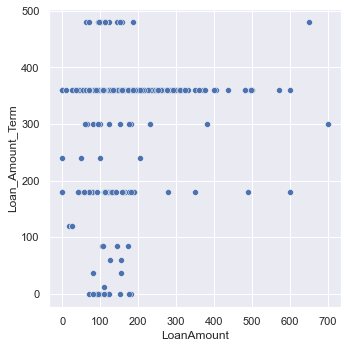

In [130]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="Loan_Amount_Term")
# no relation (<0.3)

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

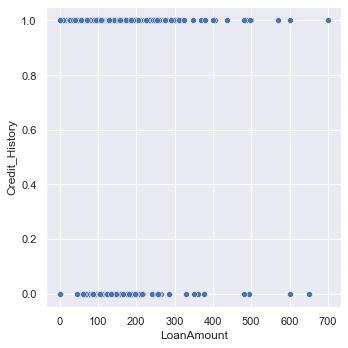

In [131]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="Credit_History")
#no relation (<-0.3)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome_Bin'>

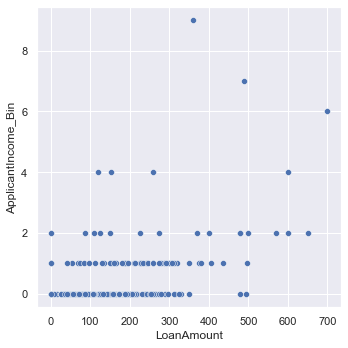

In [132]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="ApplicantIncome_Bin")
# medium positive relation

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

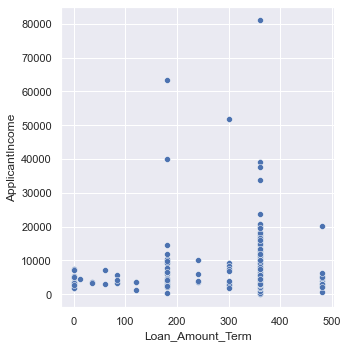

In [133]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="ApplicantIncome")
# no relation (<-0.3)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>

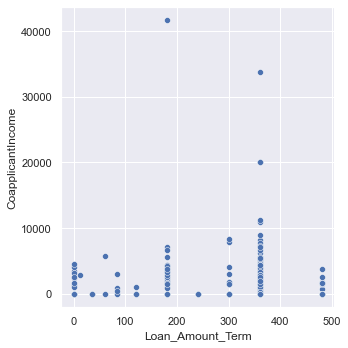

In [134]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="CoapplicantIncome")
#no relation (<-0.3)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

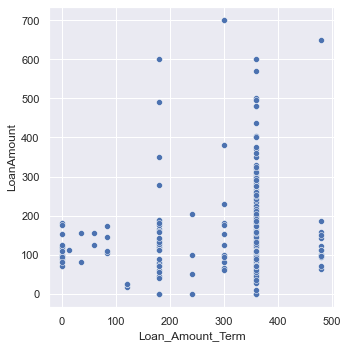

In [135]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="LoanAmount")
# no relation (<0.3)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Credit_History'>

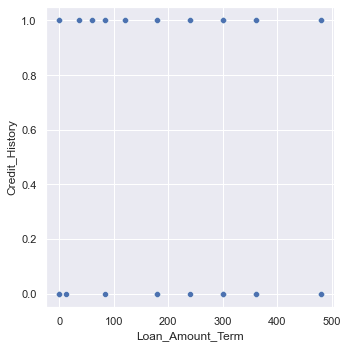

In [136]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="Credit_History")
# no relation (<0.3)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome_Bin'>

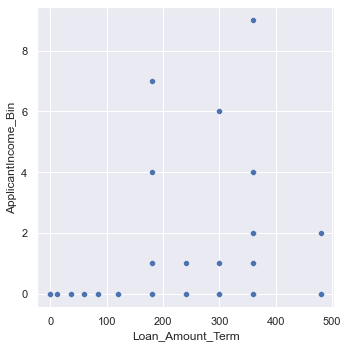

In [137]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="ApplicantIncome_Bin")
# no relation(<-0.3)

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

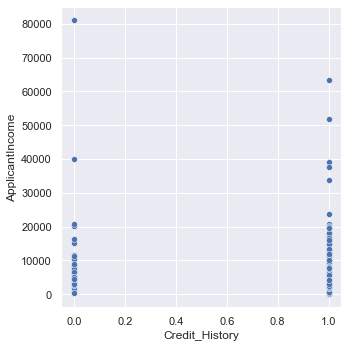

In [138]:
sns.scatterplot(data=TrainData, x="Credit_History", y="ApplicantIncome")
# no relation (<0.3)

<AxesSubplot:xlabel='Credit_History', ylabel='CoapplicantIncome'>

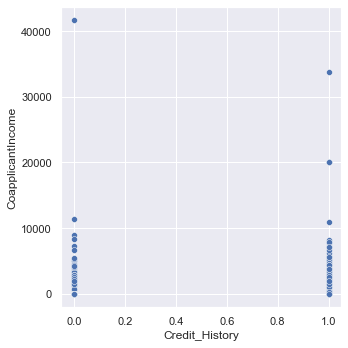

In [139]:
sns.scatterplot(data=TrainData, x="Credit_History", y="CoapplicantIncome")
# no relation (<-0.3)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

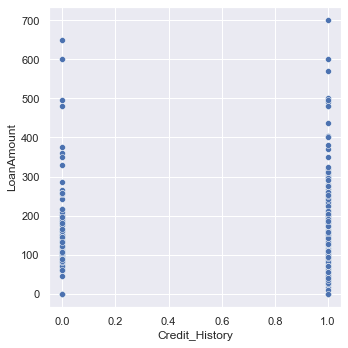

In [140]:
sns.scatterplot(data=TrainData, x="Credit_History", y="LoanAmount")
# no relation (<-0.3)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Amount_Term'>

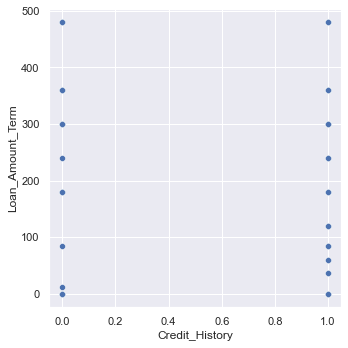

In [141]:
sns.scatterplot(data=TrainData, x="Credit_History", y="Loan_Amount_Term")
# no relation (<0.3)

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome_Bin'>

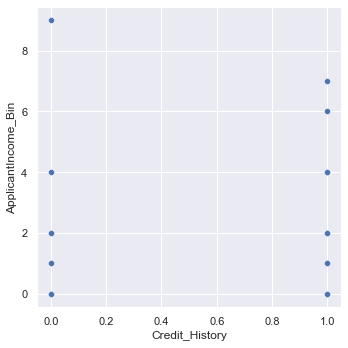

In [142]:
sns.scatterplot(data=TrainData, x="Credit_History", y="ApplicantIncome_Bin")
# no relation (<0.3)

<AxesSubplot:xlabel='ApplicantIncome_Bin', ylabel='ApplicantIncome'>

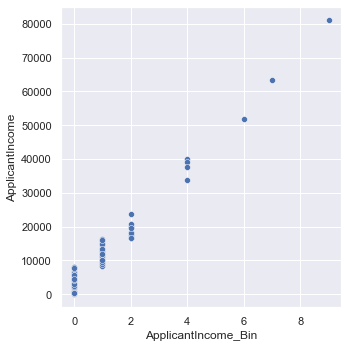

In [143]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="ApplicantIncome")
# strong positive relation

<AxesSubplot:xlabel='ApplicantIncome_Bin', ylabel='CoapplicantIncome'>

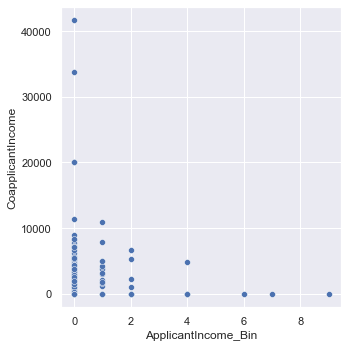

In [144]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="CoapplicantIncome")
# no relation (<-0.3)

<AxesSubplot:xlabel='ApplicantIncome_Bin', ylabel='LoanAmount'>

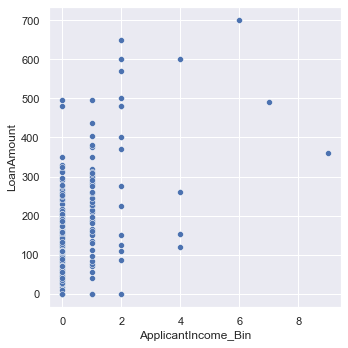

In [145]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="LoanAmount")
#medium positive relation

<AxesSubplot:xlabel='ApplicantIncome_Bin', ylabel='Loan_Amount_Term'>

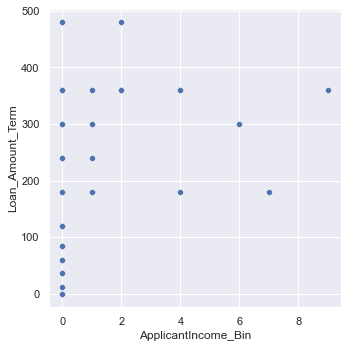

In [146]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="Loan_Amount_Term")
# no relation (<-0.3)

<AxesSubplot:xlabel='ApplicantIncome_Bin', ylabel='Credit_History'>

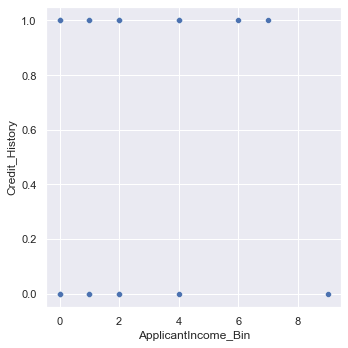

In [147]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="Credit_History")
# no relation (<0.3)